위 그림처럼 판다스에서는 2가지 오브젝트 Series 와   
DataFrame가 있습니다.

* Series: 1차원 데이터와 각 데이터의 위치정보를   
담는 인덱스로 구성
* DataFrame: 2차원 데이터와 인덱스, 컬럼으로 구성

쉽게 생각하면 DataFrame에서 하나의 컬럼만 가지고  
있는 것이 Series입니다.

Series는 어떻게 생성할 수 있을까요?

In [82]:
import numpy as np
import pandas as pd

In [83]:
s = pd.Series([1,3,5,np.nan,6,8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


위와 같이 Series() 안에 list로 1차원 데이터만 넘기면  
됩니다. index는 입력하지 않아도 자동으로 0부터 입력됩니다.  
  
만약 다른 index를 입력하고 싶으시면 똑같이 list 형식으로  
입력하면 됩니다.

DataFrame은 어떻게 생성할까요?

In [84]:
dates = pd.date_range('20210101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
print(df)

                   A         B         C         D
2021-01-01  2.123464 -1.015579 -1.258695 -1.536789
2021-01-02  0.400530  1.691283 -0.041470  0.814697
2021-01-03 -0.752518  0.246008 -0.679602 -0.666296
2021-01-04  1.428510 -0.824029  1.458729  0.496933
2021-01-05  1.065465  0.753985 -2.204192 -2.370148
2021-01-06 -0.193727 -0.724228  0.866821  0.576121


먼저 index가 시간에 관련된 데이터라고 가정하고   
data_range()를 이용하여 시간에 대한 1차원 데이터를  
생성하였습니다.

그리고 np.random.randn()을 통해 6x4에 해당하는 2차원  
데이터를 생성하였습니다. 

columns 또한 DataFrame에서 사용될 컬럼의 이름을   
1차원 데이터(A,B,C,D)로 생성합니다.

위 3가지 데이터 (컬럼, 인덱스, 2차원 데이터)를 가지고  
만들었습니다

In [85]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


각 Key값과 Value(1차원 데이터)가 DataFrame의 하나의 컬럼과  
2차원 데이터가 됩니다.

당연하겠지만 모든 딕셔너리의 Value의 리스트 길이가 같아야  
 생성할 수 있습니다.

DataFrame의 .dtypes라는 값에는 각 컬럼이 어떤 데이터  
형식인지가 저장되어 있습니다.

만약 섞여있을 경우 object가 됩니다.  

In [86]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

.dtypes외의 다른 속성값을 보고 싶은 경우,

* Jupyter Notebook: df. 입력후 TAB 입력
* Visual Studio Code: df. 입력후 CTRL + SPACE 입력

In [87]:
df2.A

0    1.0
1    1.0
2    1.0
3    1.0
Name: A, dtype: float64

## 데이터 확인하기 (Viewing Data)

DataFrame은 head(), tail()의 함수로 처음과 끝의 일부  
데이터만 살짝 볼 수 있습니다.

데이터가 큰 경우에 데이터가 어떤식으로 구성되어 있는지  
확인할 때 자주 사용합니다.

In [88]:
# 첫번째 행부터 5개를 보여줍니다.
df.head() 

,A,B,C,D
2021-01-01,2.123464,-1.015579,-1.258695,-1.536789
2021-01-02,0.400530,1.691283,-0.041470,0.814697
2021-01-03,-0.752518,0.246008,-0.679602,-0.666296
2021-01-04,1.428510,-0.824029,1.458729,0.496933
2021-01-05,1.065465,0.753985,-2.204192,-2.370148


In [89]:
# 마지막 행에서 3개를 보여줍니다.
df.tail(3)

,A,B,C,D
2021-01-04,1.428510,-0.824029,1.458729,0.496933
2021-01-05,1.065465,0.753985,-2.204192,-2.370148
2021-01-06,-0.193727,-0.724228,0.866821,0.576121


DataFrame의 대표적인 값인 .columns, .index, .values는   다음과 같이 각각 확인할 수 있습니다.

In [90]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [91]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [92]:
df.values

array([[ 2.12346445, -1.01557938, -1.25869503, -1.53678901],
       [ 0.40053048,  1.69128276, -0.04147024,  0.8146968 ],
       [-0.75251759,  0.2460081 , -0.67960203, -0.66629595],
       [ 1.42850972, -0.82402926,  1.45872916,  0.49693311],
       [ 1.06546511,  0.75398535, -2.20419181, -2.37014814],
       [-0.19372679, -0.72422788,  0.8668215 ,  0.57612135]])

DataFrame의 to_numpy()를 이용하여 인덱스와 컬럼을 제외한  
2차원 데이터만을 numpy의 형식으로 반환해줍니다.

사실은 .values와 동일합니다.

In [93]:
df.to_numpy()

array([[ 2.12346445, -1.01557938, -1.25869503, -1.53678901],
       [ 0.40053048,  1.69128276, -0.04147024,  0.8146968 ],
       [-0.75251759,  0.2460081 , -0.67960203, -0.66629595],
       [ 1.42850972, -0.82402926,  1.45872916,  0.49693311],
       [ 1.06546511,  0.75398535, -2.20419181, -2.37014814],
       [-0.19372679, -0.72422788,  0.8668215 ,  0.57612135]])

DataFrame의 desribe()를 통해 각 컬럼의 통계적인 수치를  
요약하여 보여줄 수 있습니다.

count: 데이터 개수  
mean: 평균값  
std: 표준편차  
min: 최소값  
25%: 1사분위값  
50%: 중앙값  
75%: 3사분위값  
max: 최대값  

In [94]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.678621,0.021240,-0.309735,-0.447580
std,1.066399,1.069736,1.357204,1.301068
min,-0.752518,-1.015579,-2.204192,-2.370148
25%,-0.045162,-0.799079,-1.113922,-1.319166
50%,0.732998,-0.239110,-0.360536,-0.084681
75%,1.337749,0.626991,0.639749,0.556324
max,2.123464,1.691283,1.458729,0.814697


DataFrame의 .T 속성은 values를 Transpose한 결과를  
보여줍니다.

Transpose는 인덱스를 컬럼으로, 컬럼을 인덱스로 변경하여  
보여주는 것입니다.

In [95]:
df.T


,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06
A,2.123464,0.400530,-0.752518,1.428510,1.065465,-0.193727
B,-1.015579,1.691283,0.246008,-0.824029,0.753985,-0.724228
C,-1.258695,-0.041470,-0.679602,1.458729,-2.204192,0.866821
D,-1.536789,0.814697,-0.666296,0.496933,-2.370148,0.576121


DataFrame의 sort_index()를 통해 인덱스 또는 컬럼의   이름으로 정렬을 할 수도 있습니다.

* axis: 축 기준 정보 (0: 인덱스 기준, 1: 컬럼 기준)  
* ascending: 정렬 방식 (false : 내림차순, true: 오름차순)

In [96]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2021-01-01,-1.536789,-1.258695,-1.015579,2.123464
2021-01-02,0.814697,-0.041470,1.691283,0.400530
2021-01-03,-0.666296,-0.679602,0.246008,-0.752518
2021-01-04,0.496933,1.458729,-0.824029,1.428510
2021-01-05,-2.370148,-2.204192,0.753985,1.065465
2021-01-06,0.576121,0.866821,-0.724228,-0.193727


DataFrame의 sort_values() 를 이용하여 value 값 기준으로  
정렬할 수도 있습니다.

* by: 데이터 정렬에 기준이 되는 컬럼

In [97]:
df.sort_values(by='B')

,A,B,C,D
2021-01-01,2.123464,-1.015579,-1.258695,-1.536789
2021-01-04,1.428510,-0.824029,1.458729,0.496933
2021-01-06,-0.193727,-0.724228,0.866821,0.576121
2021-01-03,-0.752518,0.246008,-0.679602,-0.666296
2021-01-05,1.065465,0.753985,-2.204192,-2.370148
2021-01-02,0.400530,1.691283,-0.041470,0.814697


## 데이터 선택하기 (Selection)

## 데이터 가져오기

컬럼을 기준으로 데이터를 가져올 수 있습니다.

In [98]:
# df.A 또는 df['A']로 컬럼의 데이터를 얻을 수 있습니다.
df['A']

2021-01-01    2.123464
2021-01-02    0.400530
2021-01-03   -0.752518
2021-01-04    1.428510
2021-01-05    1.065465
2021-01-06   -0.193727
Freq: D, Name: A, dtype: float64

[]을 이용하여 특정 범위의 행을 슬라이싱할 수 있습니다.

In [99]:
# 0~2번 행을 슬라이싱 합니다.
df[0:3]

,A,B,C,D
2021-01-01,2.123464,-1.015579,-1.258695,-1.536789
2021-01-02,0.400530,1.691283,-0.041470,0.814697
2021-01-03,-0.752518,0.246008,-0.679602,-0.666296


In [100]:
# 20130102 부터 20130104 까지 행을 슬라이싱 합니다.
df['20210102':'20210104']

,A,B,C,D
2021-01-02,0.400530,1.691283,-0.041470,0.814697
2021-01-03,-0.752518,0.246008,-0.679602,-0.666296
2021-01-04,1.428510,-0.824029,1.458729,0.496933


## 이름으로 데이터 가져오기 

이름(Label)로 가져오는 것은 DataFrame의 .loc 속성을  
이용합니다.

.loc은 2차원으로 구성되어 있습니다.  
.loc[인덱스명, 컬럼명] 형식으로 접근가능 합니다.

만약 인덱스명만 입력하면 행의 값으로 결과가 나옵니다.  
또한 인덱스명, 컬럼명을 선택할때 리스트 형식으로  
멀티인덱싱이 가능합니다.

In [101]:
# 0번 인덱스명으로 데이터 가져오기
df.loc[dates[0]]

A    2.123464
B   -1.015579
C   -1.258695
D   -1.536789
Name: 2021-01-01 00:00:00, dtype: float64

In [102]:
# 행은 전체 선택, 컬럼명은 'A','B' 두개 선택하여 가져오기
df.loc[:,['A','B']]

,A,B
2021-01-01,2.123464,-1.015579
2021-01-02,0.400530,1.691283
2021-01-03,-0.752518,0.246008
2021-01-04,1.428510,-0.824029
2021-01-05,1.065465,0.753985
2021-01-06,-0.193727,-0.724228


In [103]:
#행은 슬라이싱으로 범위 선택, 컬럼명은 'A', 'B' 선택
df.loc['20210102':'20210104',['A','B']]

,A,B
2021-01-02,0.400530,1.691283
2021-01-03,-0.752518,0.246008
2021-01-04,1.428510,-0.824029


In [104]:
#행은 20130102 선택, 컬럼명은 'A', 'B' 선택
df.loc['20210102',['A','B']]

A    0.400530
B    1.691283
Name: 2021-01-02 00:00:00, dtype: float64

인덱스명, 컬럼명을 하나씩 선택하면 스칼라값을 가져올 수 있습니다.

In [105]:
# 행은 첫번째 선택, 컬럼은 'A' 선택
df.loc[dates[0],'A']

2.1234644530882676

## 인덱스로 데이터 가져오기 
여기서 말하는 인덱스는 위치(숫자) 정보를 말합니다.  
DataFrame의 .iloc 속성을 이용합니다.  
.iloc도 2차원 형태로 구성되어 있어 1번째 인덱스는 행의  
번호를, 2번째 인덱스는 컬럼의 번호를 의미합니다.  
마찬가지로 멀티인덱싱도 가능합니다.

In [106]:
# 3번 인덱스 행 가져오기
df.iloc[3]

A    1.428510
B   -0.824029
C    1.458729
D    0.496933
Name: 2021-01-04 00:00:00, dtype: float64

In [107]:
# 3~4번 인덱스 행, 0~1번 컬럼 값 가져오기
df.iloc[3:5,0:2]

,A,B
2021-01-04,1.428510,-0.824029
2021-01-05,1.065465,0.753985


In [108]:
# 1,2,4번 인뎅스 행과 0,2번 인덱스 컬럼 가져오기
df.iloc[[1,2,4],[0,2]]

,A,C
2021-01-02,0.400530,-0.041470
2021-01-03,-0.752518,-0.679602
2021-01-05,1.065465,-2.204192


In [109]:
# 1~2번 인덱스 행과 전체 컬럼 값 가져오기
df.iloc[1:3,:]

,A,B,C,D
2021-01-02,0.400530,1.691283,-0.041470,0.814697
2021-01-03,-0.752518,0.246008,-0.679602,-0.666296


In [110]:
# 전체 행과 1~2번 인덱스 컬럼 값 가져오기
df.iloc[:,1:3]

,B,C
2021-01-01,-1.015579,-1.258695
2021-01-02,1.691283,-0.041470
2021-01-03,0.246008,-0.679602
2021-01-04,-0.824029,1.458729
2021-01-05,0.753985,-2.204192
2021-01-06,-0.724228,0.866821


In [111]:
# 1번 행, 1번 컬럼 값 가져오기
df.iloc[1,1]

1.691282763876513

In [112]:
# 위와 동일하지만 스칼라값을 가져오는 속도가 .iat이 빠르다고 알려져있음
df.iat[1,1]

1.691282763876513

## 조건으로 가져오기

하나의 컬럼의 값에 따라 행들을 선택할 수 있습니다.

In [113]:
df[df['A'] > 0]

,A,B,C,D
2021-01-01,2.123464,-1.015579,-1.258695,-1.536789
2021-01-02,0.400530,1.691283,-0.041470,0.814697
2021-01-04,1.428510,-0.824029,1.458729,0.496933
2021-01-05,1.065465,0.753985,-2.204192,-2.370148


DataFrame의 값 조건에 해당하는 것만 선택할 수도 있습니다.

In [114]:
df[df > 0]

,A,B,C,D
2021-01-01,2.123464,NaN,NaN,NaN
2021-01-02,0.400530,1.691283,NaN,0.814697
2021-01-03,NaN,0.246008,NaN,NaN
2021-01-04,1.428510,NaN,1.458729,0.496933
2021-01-05,1.065465,0.753985,NaN,NaN
2021-01-06,NaN,NaN,0.866821,0.576121


isin()을 이용하여 필터링을 할 수 있습니다.

In [115]:
# df를 복사합니다.
df2 = df.copy()
# 새로운 컬럼E에 값을 넣습니다.
df2['E'] = ['one','one', 'two','three','four','three']
df2

,A,B,C,D,E
2021-01-01,2.123464,-1.015579,-1.258695,-1.536789,one
2021-01-02,0.400530,1.691283,-0.041470,0.814697,one
2021-01-03,-0.752518,0.246008,-0.679602,-0.666296,two
2021-01-04,1.428510,-0.824029,1.458729,0.496933,three
2021-01-05,1.065465,0.753985,-2.204192,-2.370148,four
2021-01-06,-0.193727,-0.724228,0.866821,0.576121,three


In [116]:
# 컬럼 E에 들어있는것만 필터링합니다.
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2021-01-03,-0.752518,0.246008,-0.679602,-0.666296,two
2021-01-05,1.065465,0.753985,-2.204192,-2.370148,four


## 데이터 변경하기 
DataFrame 안에 있는 데이터를 변경하려고 합니다.  
우선 Series를 하나 만들고 기존에 생성했던  
DataFrame에 붙여보겠습니다.

In [117]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20210102',periods=6))
# series를 'F' 컬럼에 넣는다.
df['F'] = s1
df

,A,B,C,D,F
2021-01-01,2.123464,-1.015579,-1.258695,-1.536789,NaN
2021-01-02,0.400530,1.691283,-0.041470,0.814697,1.0
2021-01-03,-0.752518,0.246008,-0.679602,-0.666296,2.0
2021-01-04,1.428510,-0.824029,1.458729,0.496933,3.0
2021-01-05,1.065465,0.753985,-2.204192,-2.370148,4.0
2021-01-06,-0.193727,-0.724228,0.866821,0.576121,5.0


데이터 선택하기와 같은 속성 at, iat, loc, iloc 등을 그대로 사용하면 됩니다.

In [118]:
# 0번째 인덱스, 'A' 컬럼을 0으로 변견
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2021-01-01,0.000000,-1.015579,-1.258695,-1.536789,NaN
2021-01-02,0.400530,1.691283,-0.041470,0.814697,1.0
2021-01-03,-0.752518,0.246008,-0.679602,-0.666296,2.0
2021-01-04,1.428510,-0.824029,1.458729,0.496933,3.0
2021-01-05,1.065465,0.753985,-2.204192,-2.370148,4.0
2021-01-06,-0.193727,-0.724228,0.866821,0.576121,5.0


In [119]:
# 0번째 인덱스, 1번째 컬럼을 0으로 변경
df.iat[0,1] = 0
df

,A,B,C,D,F
2021-01-01,0.000000,0.000000,-1.258695,-1.536789,NaN
2021-01-02,0.400530,1.691283,-0.041470,0.814697,1.0
2021-01-03,-0.752518,0.246008,-0.679602,-0.666296,2.0
2021-01-04,1.428510,-0.824029,1.458729,0.496933,3.0
2021-01-05,1.065465,0.753985,-2.204192,-2.370148,4.0
2021-01-06,-0.193727,-0.724228,0.866821,0.576121,5.0


In [120]:
# 전체 인덱스, 'D' 컬럼 데이터를 변경
# df.loc[:,'D'] = np.array([5] * len(df))
df.loc[:,'D'] = 5
df

,A,B,C,D,F
2021-01-01,0.000000,0.000000,-1.258695,5,NaN
2021-01-02,0.400530,1.691283,-0.041470,5,1.0
2021-01-03,-0.752518,0.246008,-0.679602,5,2.0
2021-01-04,1.428510,-0.824029,1.458729,5,3.0
2021-01-05,1.065465,0.753985,-2.204192,5,4.0
2021-01-06,-0.193727,-0.724228,0.866821,5,5.0


조건문(where)으로 선택하여 데이터를 변경할 수도 있습니다.

In [121]:
# 기존 DataFrame 복사
df2 = df.copy()
# 0 보다 큰 데이터만 음수로 변경
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2021-01-01,0.000000,0.000000,-1.258695,-5,NaN
2021-01-02,-0.400530,-1.691283,-0.041470,-5,-1.0
2021-01-03,-0.752518,-0.246008,-0.679602,-5,-2.0
2021-01-04,-1.428510,-0.824029,-1.458729,-5,-3.0
2021-01-05,-1.065465,-0.753985,-2.204192,-5,-4.0
2021-01-06,-0.193727,-0.724228,-0.866821,-5,-5.0


## 결측 데이터 (Missing Data)

데이터를 다루다보면 값이 없는 경우가 자주 생깁니다.  
데이터가 없는 것을 결측 데이터라고 합니다.

판다스에서는 이러한 값이 NaN 으로 표현됩니다.  
기본적으로 결측 데이터가 있는 경우에는 연산에 포함되지 않습니다.  

reindex()을 통해 컬럼이나 인덱스를 추가하거나,  
삭제하거나 변경하는 등의 작업을 진행할 수 있습니다.

먼저 결측 데이터를 만들기 위해 ‘E’ 컬럼을 생성합니다.

In [122]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2021-01-01,0.000000,0.000000,-1.258695,5,NaN,1.0
2021-01-02,0.400530,1.691283,-0.041470,5,1.0,1.0
2021-01-03,-0.752518,0.246008,-0.679602,5,2.0,NaN
2021-01-04,1.428510,-0.824029,1.458729,5,3.0,NaN


DataFrame의 dropna()를 통해 결측데이터를 삭제(drop)할 수 있습니다. 

how='any'는 값들 중 하나라도 NaN인 경우 삭제입니다.   
how='all'은 전체가 NaN인 경우 삭제입니다.



In [123]:
df1.dropna()

,A,B,C,D,F,E
2021-01-02,0.40053,1.691283,-0.04147,5,1.0,1.0


pd.isnull()을 통해 결측데이터 여부를 Boolean으로 가져올 수 있습니다.

In [124]:
pd.isnull(df1)

,A,B,C,D,F,E
2021-01-01,False,False,False,False,True,False
2021-01-02,False,False,False,False,False,False
2021-01-03,False,False,False,False,False,True
2021-01-04,False,False,False,False,False,True


DataFrame의 fillna()를 통해 결측데이터에 값을 넣을 수도 있습니다.

In [125]:
df1.fillna(value=5)

,A,B,C,D,F,E
2021-01-01,0.000000,0.000000,-1.258695,5,5.0,1.0
2021-01-02,0.400530,1.691283,-0.041470,5,1.0,1.0
2021-01-03,-0.752518,0.246008,-0.679602,5,2.0,5.0
2021-01-04,1.428510,-0.824029,1.458729,5,3.0,5.0


## 데이터 연산 (Operations)

## 통계지표
일반적으로 결측데이터는 빼고 계산됩니다.  
DataFrame의 mean()으로 평균을 구할 수 있습니다.

In [126]:
df.mean()

A    0.324710
B    0.190503
C   -0.309735
D    5.000000
F    3.000000
dtype: float64

같은 mean()을 다른 축(axis)에 대한 평균을 구할 수 있습니다.  
여기서 축이란 0은 컬럼 기준, 1은 인덱스 기준을 말합니다.

In [127]:
df.mean(1)

2021-01-01    0.935326
2021-01-02    1.610069
2021-01-03    1.162778
2021-01-04    2.012642
2021-01-05    1.723052
2021-01-06    1.989773
Freq: D, dtype: float64

만약 다른 차원의 오브젝트들 간 연산이 필요한 경우  
축만 맞춰진다면 자동으로 연산을 수행합니다.

In [128]:
# 데이터 시프트 연산 (2개씩 밀립니다.)
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2021-01-01    NaN
2021-01-02    NaN
2021-01-03    1.0
2021-01-04    3.0
2021-01-05    5.0
2021-01-06    NaN
Freq: D, dtype: float64

In [129]:
# DataFrame와 Series 를 index 축 기준으로 빼기 연산
df.sub(s, axis='index')

,A,B,C,D,F
2021-01-01,NaN,NaN,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN,NaN,NaN
2021-01-03,-1.752518,-0.753992,-1.679602,4.0,1.0
2021-01-04,-1.571490,-3.824029,-1.541271,2.0,0.0
2021-01-05,-3.934535,-4.246015,-7.204192,0.0,-1.0
2021-01-06,NaN,NaN,NaN,NaN,NaN


## 함수 적용 
데이터에 대해 정의된 함수들이나 lamdba 식을 이용하여   
새로운 함수도 적용할 수 있습니다.

In [130]:
# 각 컬럼별(기본 axis=0은 컬럼 기준) 누적합을 구합니다.
df.apply(np.cumsum)

,A,B,C,D,F
2021-01-01,0.000000,0.000000,-1.258695,5,NaN
2021-01-02,0.400530,1.691283,-1.300165,10,1.0
2021-01-03,-0.351987,1.937291,-1.979767,15,3.0
2021-01-04,1.076523,1.113262,-0.521038,20,6.0
2021-01-05,2.141988,1.867247,-2.725230,25,10.0
2021-01-06,1.948261,1.143019,-1.858408,30,15.0


In [131]:
# Lambda 식을 이용하여 max-min 의 값을 구합니다.
df.apply(lambda x: x.max() - x.min())

A    2.181027
B    2.515312
C    3.662921
D    0.000000
F    4.000000
dtype: float64

# 히스토그램 
Series 데이터의 각 값이 어떤 분포를 이루는지  
히스토그램 형식으로 볼 수 있습니다.



In [132]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    2
2    6
3    0
4    0
5    1
6    4
7    3
8    2
9    2
dtype: int64

In [133]:
s.value_counts()

2    4
0    2
6    1
4    1
3    1
1    1
dtype: int64

## 문자열 처리
Series에서 문자열 관련된 함수들은 .str 속성에 포함되어 있습니다.

str.lower()를 통해 문자를 소문자로 변경할 수 있습니다.

In [134]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 1, 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     NaN
8     dog
9     cat
dtype: object

## 데이터 합치기 (Merge)

판다스는 Series와 DataFrame 간에 쉽게 데이터를 합칠 수 있도록  
join과 merge와 같은 연산을 제공합니다.

## 이어붙이기 
concat()을 이용하여 이어붙이는 연산(Concatenating)을 할 수 있습니다.

In [135]:
df = pd.DataFrame(np.random.randn(10, 4))
# 위에서 생성한 DataFrame 을 여러개로 분리합니다.
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  1.061530 -1.307545 -0.253565 -0.917718
 1  0.470564  1.047458 -0.096771  0.306484
 2 -0.945546  0.561284  1.195316 -0.830992,
           0         1         2         3
 3 -1.264290  0.691055 -0.059612 -0.897420
 4 -0.282817 -2.530634  0.267089  0.588715
 5 -0.148415  0.726532  0.078228  0.083466
 6 -1.484117 -0.193424 -1.858755  0.112660,
           0         1         2         3
 7 -0.132115 -1.633468  0.498360  0.693392
 8 -0.534920 -0.121189 -2.108844  1.290076
 9  0.383777 -1.861915  0.395543  1.149942]

In [136]:
# concat()을 이용하여 다시 이어붙일 수 있습니다.
pd.concat(pieces)

,0,1,2,3
0,1.061530,-1.307545,-0.253565,-0.917718
1,0.470564,1.047458,-0.096771,0.306484
2,-0.945546,0.561284,1.195316,-0.830992
3,-1.264290,0.691055,-0.059612,-0.897420
4,-0.282817,-2.530634,0.267089,0.588715
5,-0.148415,0.726532,0.078228,0.083466
6,-1.484117,-0.193424,-1.858755,0.112660
7,-0.132115,-1.633468,0.498360,0.693392
8,-0.534920,-0.121189,-2.108844,1.290076
9,0.383777,-1.861915,0.395543,1.149942


## 조인

SQL에서 자주 사용하는 join 연산도 제공됩니다.

In [137]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
print(left)
print(right)

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


In [138]:
# 위에서 생성한 left, right를 'key' 컬럼값 기준으로 조인합니다.
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


key가 다른 경우도 보겠습니다

In [140]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(left)
print(right)

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


아래 예제처럼 조인 연산 자체가 key가 같은 두 테이블을 합쳐서  
하나의 테이블로 확인하기 위해 사용하는데,   
만약 Key가 중복된 경우가 있으면 어떻게 나오는지는   
위 예제로 확인하실 수 있습니다.

In [141]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


# 그룹화 (Grouping)  

group by에 관련된 내용은 아래와 같은 과정을 말합니다.

* Spltting : 특정 기준으로 데이터 나누기
* applying : 각 그룹에 함수를 독립적으로 적용시키는 것
* Combining : 결과를 데이터 구조로 저장하는 것

먼저 DataFrame을 하나 생성하겠습니다.

In [143]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-1.126246,1.734827
1,bar,one,2.852717,-2.366683
2,foo,two,-0.846625,1.275149
3,bar,three,-0.530961,-1.370017
4,foo,two,1.654849,0.435891
5,bar,two,-0.706222,-0.199415
6,foo,one,0.907533,1.516775
7,foo,three,-1.533624,1.324627


특정 컬럼 기준으로 먼저 그룹화를 진행한 후 sum()을 적용합니다.

In [144]:
# A컬럼이 같은 것끼리 묶고, sum()
df.groupby('A').sum()

,C,D
A,,
bar,1.615534,-3.936114
foo,-0.944114,6.287267


In [145]:
# A기준으로 묶고, B기준으로 다시 묶은 후 sum()
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    2.852717 -2.366683
    three -0.530961 -1.370017
    two   -0.706222 -0.199415
foo one   -0.218714  3.251601
    three -1.533624  1.324627
    two    0.808224  1.711039

# 데이터 구조 변경하기 (Reshaping)
## 피벗 테이블 
우선 DataFrame을 하나 생성하겠습니다.

In [146]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.205494,0.692431
1,one,B,foo,-1.019788,-0.936431
2,two,C,foo,-1.852030,1.794609
3,three,A,bar,0.391939,0.685505
4,one,B,bar,-0.342770,-0.550605
5,one,C,bar,-1.089591,0.048881
6,two,A,foo,-0.039371,-0.552912
7,three,B,foo,-0.341757,0.009193
8,one,C,foo,1.093630,-0.014472
9,one,A,bar,0.449176,-0.348114


pd.pivot_table()을 통해 새로운 피벗으로 테이블을 만들 수 있습니다.

In [147]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.449176  0.205494
      B -0.342770 -1.019788
      C -1.089591  1.093630
three A  0.391939       NaN
      B       NaN -0.341757
      C  1.102015       NaN
two   A       NaN -0.039371
      B -0.122073       NaN
      C       NaN -1.852030

# 시계열 데이터 (Time Series)

판다스는 시계열 데이터를 주기를 변경하거나 샘플링하는데  
간단하고 강력한 기능을 제공합니다.  
또한 금융 데이터를 다루기에도 편리합니다.  
(예를 들어 1초마다 쌓은 데이터를 5분 단위로 변경하고 싶을 때)  

resample()을 이용하여 데이터 샘플링을 할 수 있습니다



In [150]:
# 1초 단위로 10개의 index생성
rng = pd.date_range('1/1/2021', periods=10, freq='S')
rng

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 00:00:01',
               '2021-01-01 00:00:02', '2021-01-01 00:00:03',
               '2021-01-01 00:00:04', '2021-01-01 00:00:05',
               '2021-01-01 00:00:06', '2021-01-01 00:00:07',
               '2021-01-01 00:00:08', '2021-01-01 00:00:09'],
              dtype='datetime64[ns]', freq='S')

In [152]:
# 0~50 사이 랜덤값 입력
ts = pd.Series(np.random.randint(0, 50, len(rng)), index=rng)
ts

2021-01-01 00:00:00    11
2021-01-01 00:00:01    15
2021-01-01 00:00:02    46
2021-01-01 00:00:03    39
2021-01-01 00:00:04    49
2021-01-01 00:00:05     4
2021-01-01 00:00:06    45
2021-01-01 00:00:07    33
2021-01-01 00:00:08     8
2021-01-01 00:00:09    37
Freq: S, dtype: int64

다양한 타임존으로 변경할 수도 있습니다.

In [154]:
rng = pd.date_range('3/6/2021 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2021-03-06    0.466587
2021-03-07    0.269406
2021-03-08    0.895237
2021-03-09   -0.014986
2021-03-10   -0.405073
Freq: D, dtype: float64

In [158]:
# 표준시(UTC)로 변경
ts_utc = ts.tz_localize('UTC')
ts_utc

2021-03-06 00:00:00+00:00    0.466587
2021-03-07 00:00:00+00:00    0.269406
2021-03-08 00:00:00+00:00    0.895237
2021-03-09 00:00:00+00:00   -0.014986
2021-03-10 00:00:00+00:00   -0.405073
Freq: D, dtype: float64

In [159]:
# US 동부시로 변경
ts_utc.tz_convert('US/Eastern')
ts_utc

2021-03-06 00:00:00+00:00    0.466587
2021-03-07 00:00:00+00:00    0.269406
2021-03-08 00:00:00+00:00    0.895237
2021-03-09 00:00:00+00:00   -0.014986
2021-03-10 00:00:00+00:00   -0.405073
Freq: D, dtype: float64

시간 간격(TimeSpan)도 쉽게 표현할 수 있습니다.

In [161]:
# 매달 ('M') 기준으로 생성
rng = pd.date_range('1/1/2021', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2021-01-31    0.718672
2021-02-28    0.379704
2021-03-31   -0.554628
2021-04-30   -1.407316
2021-05-31   -1.501246
Freq: M, dtype: float64

In [163]:
ps = ts.to_period()
ps

2021-01    0.718672
2021-02    0.379704
2021-03   -0.554628
2021-04   -1.407316
2021-05   -1.501246
Freq: M, dtype: float64

In [164]:
ps.to_timestamp()

2021-01-01    0.718672
2021-02-01    0.379704
2021-03-01   -0.554628
2021-04-01   -1.407316
2021-05-01   -1.501246
Freq: MS, dtype: float64

기간(period)과 시간(timestamp) 사이에 산술적인 기능들을  
적용할 수 있습니다. 아래 예제에서는 분기별로 9시간을 더한  
시각을 기준으로 볼 수 있습니다.

In [165]:
# 분기 단위로 시간 인덱스 생성합니다.
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -0.738166
1990-06-01 09:00   -0.962895
1990-09-01 09:00   -1.359583
1990-12-01 09:00   -0.023485
1991-03-01 09:00    1.518276
Freq: H, dtype: float64

# 범주형 데이터 (Categoricals)

DataFrame 안에는 범주형 데이터도 넣을 수 있습니다.  
.astype("category")로 범주형 데이터 타입으로 변환할 수 있습니다.


In [174]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

cat.categories 속성을 이용하여 카테고리명을 다시 만들 수 있습니다.

In [175]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

cat.set_categories()를 이용하여 카테고리를 재정의할 수 있습니다.  
재정의는 현재 갖고 있지 않은 범주도 추가할 수 있습니다.

In [176]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

범주형 데이터를 정렬할 수도 있습니다.   
정렬 기준은 문자 기준이 아닌 범주형 자료를 정의할 때 만든 순서로 정렬됩니다.

In [177]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


범주형 데이터 기준으로 그룹화하여 빈도수를 출력하면,  
비어있는 범주도 쉽게 확인할 수 있습니다.

In [178]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# 그래프 시각화 (Plotting)
데이터 시각화는 matplotlib API를 사용합니다.



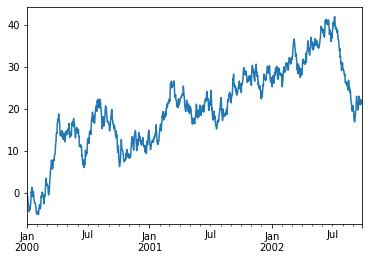

In [179]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
# 누적합
ts = ts.cumsum()
# 시각화
ts.plot()

DataFrame에서 plot()은 모든 컬럼을 한번에 보여주는 편리함도 있습니다.

<Figure size 432x288 with 0 Axes>

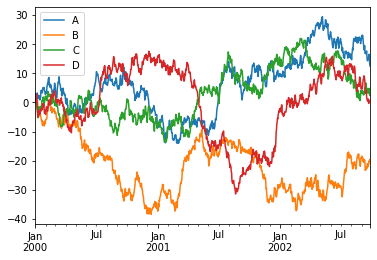

In [184]:
import matplotlib.pyplot as plt
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
 
df = df.cumsum()
 
plt.figure()
df.plot()
plt.legend(loc='best')

# 파일 입출력 (Getting Data In/Out)
DataFrame을 파일로 생성하거나 파일을 DataFrame으로 읽는 방법입니다.

## CSV파일
.to_csv()로 DataFrame을 쉽게 csv 파일로 쓸 수 있습니다

In [187]:
df.to_csv('foo.csv')
!ls

foo.csv  sample_data


## HDF파일
to_hdf()로 HDF5 형식으로 쓸 수 있습니다.

In [188]:
df.to_hdf('foo.h5','df')
!ls

foo.csv  foo.h5  sample_data


pd.read_hdf()로 hdf5 형식을 DataFrame으로 읽어올 수 있습니다.

In [189]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,1.077753,1.141709,0.900072,0.445085
2000-01-02,3.042643,0.152419,0.058266,1.152586
2000-01-03,2.630503,0.172048,-0.283738,0.223670
2000-01-04,1.900982,-0.049344,0.149389,2.009543
2000-01-05,2.271352,-0.398982,-0.971654,2.826410
...,...,...,...,...
2002-09-22,15.708316,-21.259755,3.704507,-0.335482
2002-09-23,16.542152,-20.168489,4.847662,0.141844
2002-09-24,15.204333,-20.322036,3.545705,0.574553
2002-09-25,13.277726,-19.534583,2.466165,0.688335


## Excel파일
to_excel()로 xlsx 파일 형식으로 쓸 수 있습니다.

In [190]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')
!ls

foo.csv  foo.h5  foo.xlsx  sample_data


pd.read_excel()로 xlsx 파일로부터 DataFrame으로 읽어올 수 있습니다.

In [191]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.077753,1.141709,0.900072,0.445085
1,2000-01-02,3.042643,0.152419,0.058266,1.152586
2,2000-01-03,2.630503,0.172048,-0.283738,0.223670
3,2000-01-04,1.900982,-0.049344,0.149389,2.009543
4,2000-01-05,2.271352,-0.398982,-0.971654,2.826410
...,...,...,...,...,...
995,2002-09-22,15.708316,-21.259755,3.704507,-0.335482
996,2002-09-23,16.542152,-20.168489,4.847662,0.141844
997,2002-09-24,15.204333,-20.322036,3.545705,0.574553
998,2002-09-25,13.277726,-19.534583,2.466165,0.688335
